## Clean the test dataset

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
X = pd.read_csv("housing_test_x.csv")
Y = pd.read_csv("housing_test_y.csv")

In [38]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
Y.head()

,Id,SalePrice
0,1461,120376.994315
1,1462,152387.635505
2,1463,185025.193763
3,1464,198385.651258
4,1465,185934.885245


In [40]:
Y.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [41]:
data=X.copy()
data['SalePrice']=Y['SalePrice']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,120376.994315
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,152387.635505
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,185025.193763
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,198385.651258
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,185934.885245


In [42]:
data.shape

(1459, 81)

In [43]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
data.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [45]:
data.isnull().sum(axis=0).sum()

7878

In [46]:
Missing = data.isnull().sum(axis=0)
Missing[Missing>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [47]:
data_missing = (data.isnull().sum(axis=0)/data.shape[0]) *100
data_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [48]:
data_missing[data_missing == 0].index

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [49]:
data_missing = data_missing.drop(data_missing[data_missing == 0].index)
data_missing = data_missing.sort_values(ascending=False)
data_missing

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64

/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

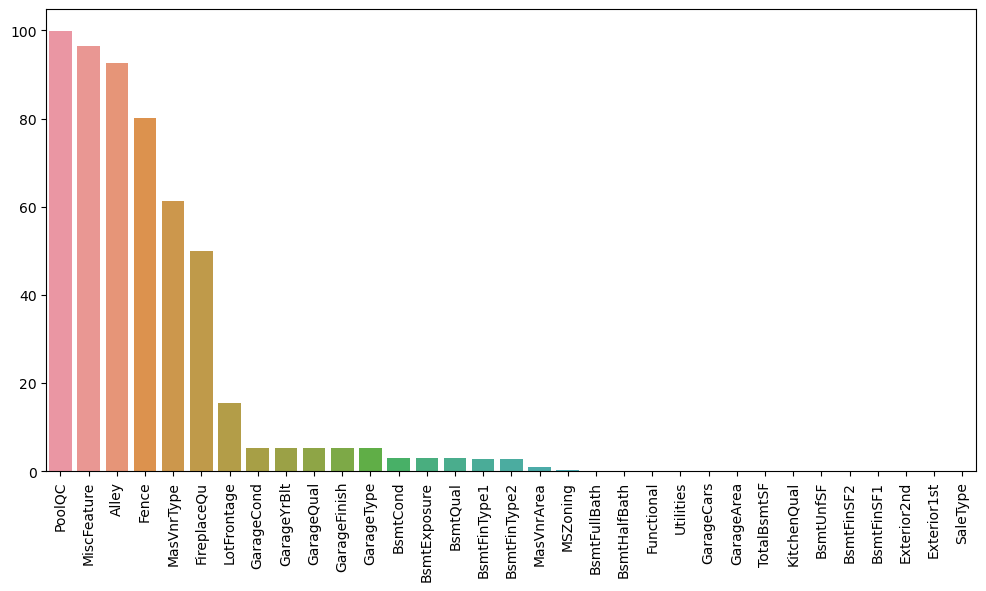

In [50]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x=data_missing.index, y=data_missing)

In [51]:
bad_column_names = data_missing[data_missing >=51].index
bad_column_names

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], dtype='object')

In [52]:
data_new = data.drop(columns=bad_column_names, axis =1)
data_new.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0           

In [71]:
columns_tobe_cleaned = data_missing[data_missing <51].index
columns_tobe_cleaned

Index(['FireplaceQu', 'LotFrontage', 'GarageCond', 'GarageYrBlt', 'GarageQual',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'MSZoning',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'KitchenQual', 'BsmtUnfSF', 'BsmtFinSF2',
       'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype='object')

In [72]:
for c in columns_tobe_cleaned:
    v=data_new[c]
    v_valid=v[~v.isnull()]
    if data_new[c].dtype == np.dtype('O'):
        data_new[c]=data_new[c].fillna(v.value_counts().index[0])
    else:
        data_new[c]=data_new[c].fillna(v_valid.median())

In [73]:
data_new.isnull().sum().sum()

0

### Data preprocessing for machine learning

convert categorical values to numerical values using one-hot encoding

In [74]:
categorical_column=[]
for c in data_new.columns:
    if data_new[c].dtype == np.dtype('O'):       
        categorical_column.append(c)
categorical_column
len(categorical_column)

38

In [75]:
data_new.shape

(1459, 76)

In [76]:
data_test=pd.get_dummies(data_new, columns=categorical_column)
data_test.shape

(1459, 257)

In [77]:
data_test.isnull().sum().sum()

0

In [78]:
data_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


### Add missing columns to  `data_clean` if necessary
`data_clean` for training has N columns (see house_price_data_clean_train.ipynb) <br>
`data_clean` for testing (this file) now may have < N columns, i.e., missing some columns <br>
if it happens, then find the missing column names, and add those to `data_clean` in this file, and the values in these columns are 0s

In [79]:
data_test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)

In [80]:
train_data = pd.read_csv("housing_train_clean.csv")
train_data.shape

(1460, 272)

In [81]:
name_missing=[]
for name in train_data:
    if name not in data_test:
        name_missing.append(name)
        print(name_missing)

['Condition2_RRAe']
['Condition2_RRAe', 'Condition2_RRAn']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'GarageQual_Ex']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor']
['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_St

In [82]:
for name in name_missing:
    data_test[name] = 0

In [83]:
name_extra=[]
for name in data_test:
    if name not in train_data:
        name_extra.append(name)
        print(name_extra)
        name_extra
        

['Id']


In [84]:
data_test = data_test.drop('Id', axis = 1)

In [85]:
data_test.shape

(1459, 272)

In [86]:
data_test = data_test.reindex(sorted(train_data.columns), axis=1)
data_test.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtCond_Fa',
       ...
       'Street_Grvl', 'Street_Pave', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object', length=272)

### Save the `clean_data` to the file "housing_test_clean.csv"

In [87]:
data_test.to_csv("housing_test_clean.csv", index=False)

In [88]:
path=""  #modify this path
train_data=pd.read_csv(path+'housing_train_clean.csv')
test_data=pd.read_csv(path+'housing_test_clean.csv')
(train_data.columns==test_data.columns).sum() != len(test_data.columns)

False